<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/SVR_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: 
https://drive.google.com/file/d/1DLjBn6uLiCT6Cg8TtR87cK-lYwaOQr6F/view?usp=sharing


Dataset column information:



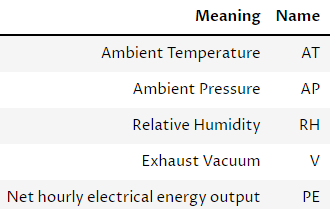

In [82]:
import statsmodels.api as sm

##Q1 Import the libraries and dataset

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns

In [84]:
df=pd.read_csv('/content/Data (1).csv')

In [85]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [86]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

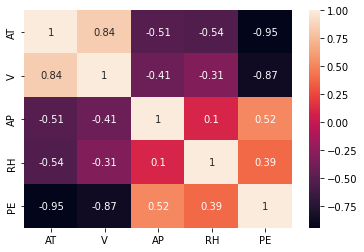

In [87]:
sns.heatmap(df.corr(),annot=True)

In [88]:
df1=df.loc[:,['AT','V','AP','PE']]

In [89]:
df1.head()

,AT,V,AP,PE
0,14.96,41.76,1024.07,463.26
1,25.18,62.96,1020.04,444.37
2,5.11,39.40,1012.16,488.56
3,20.86,57.32,1010.24,446.48
4,10.82,37.50,1009.23,473.90


##Q2 Feature Scaling

In [90]:
x=df1.iloc[:,0:3].values
y=df1.iloc[:,3].values

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

##Q3 Split the dataset into the Training set and Test set

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=50)

##Q4 Implement SVR

In [93]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

###4a RBF Kernel

In [94]:
regressor=SVR(kernel='rbf').fit(x_train,y_train)

In [95]:
y_pred=regressor.predict(x_test)

In [96]:
l=[]
r2=r2_score(y_test,y_pred)
l.append(r2_score(y_test,y_pred))
l.append(mean_squared_error(y_test,y_pred))
l.append(mean_absolute_error(y_test,y_pred))
n=len(x_train)
k=x_train.shape[1]
adjr2=1-((1-r2)*n/(n-k-1))
l.append(adjr2)
pd.DataFrame({'Metrics':['r2 score','MSE','MAE','Adjusted r2'],'Score':l})

,Metrics,Score
0,r2 score,0.936057
1,MSE,18.594015
2,MAE,3.281594
3,Adjusted r2,0.936017


###4b Linear Kernel

In [97]:
regressor=SVR(kernel='linear').fit(x_train,y_train)

In [98]:
y_pred=regressor.predict(x_test)

In [99]:
l=[]
r2=r2_score(y_test,y_pred)
l.append(r2_score(y_test,y_pred))
l.append(mean_squared_error(y_test,y_pred))
l.append(mean_absolute_error(y_test,y_pred))
n=len(x_train)
k=x_train.shape[1]
adjr2=1-((1-r2)*n/(n-k-1))
l.append(adjr2)
pd.DataFrame({'Metrics':['r2 score','MSE','MAE','Adjusted r square'],'Score':l})

,Metrics,Score
0,r2 score,0.917514
1,MSE,23.986347
2,MAE,3.864140
3,Adjusted r square,0.917462


In [100]:
len(x_train)

6410

In [101]:
df1.shape[0]

9568

###4c Polynomial Kernel

In [102]:
regressor=SVR(kernel='poly').fit(x_train,y_train)

In [103]:
y_pred=regressor.predict(x_test)

In [104]:
l=[]
r2=r2_score(y_test,y_pred)
l.append(r2_score(y_test,y_pred))
l.append(mean_squared_error(y_test,y_pred))
l.append(mean_absolute_error(y_test,y_pred))
n=len(x_train)
k=x_train.shape[1]
adjr2=1-((1-r2)*n/(n-k-1))
l.append(adjr2)
pd.DataFrame({'Metrics':['r2 score','MSE','MAE','Adjusted r2'],'Score':l})

,Metrics,Score
0,r2 score,0.749825
1,MSE,72.748691
2,MAE,6.560483
3,Adjusted r2,0.749669


###4d Sigmoid Kernel

In [105]:
regressor=SVR(kernel='sigmoid').fit(x_train,y_train)

In [106]:
y_pred=regressor.predict(x_test)

In [107]:
l=[]
r2=r2_score(y_test,y_pred)
l.append(r2_score(y_test,y_pred))
l.append(mean_squared_error(y_test,y_pred))
l.append(mean_absolute_error(y_test,y_pred))
n=len(x_train)
k=x_train.shape[1]
adjr2=1-((1-r2)*n/(n-k-1))
l.append(adjr2)
pd.DataFrame({'Metrics':['r2 score','MSE','MAE','Adjusted r2'],'Score':l})

,Metrics,Score
0,r2 score,-106.402743
1,MSE,31231.828520
2,MAE,133.465280
3,Adjusted r2,-106.469807


## Model does not train well if Sigmoid kernel is used.



---



---



---



In [108]:
model = sm.OLS(y_train,x_train).fit()


In [112]:
model.predict(x_test)

array([  7.77195233,  29.16834711,  35.62285599, ..., -15.41136633,
        29.37446318, -18.61271994])

In [113]:
model.rsquared_adj

0.0017207932577405494

In [114]:
model.rsquared

0.002188006615030158